In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import yfinance as yf


In [3]:
ticker = "INFY.NS"
start_date = "2025-10-13"
end_date = "2025-10-14"

ohlc = yf.download(ticker, start=start_date, end=end_date, interval="1m")
ohlc.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6848\2219107369.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ohlc = yf.download(ticker, start=start_date, end=end_date, interval="1m")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Datetime,,,,,
2025-10-13 03:45:00+00:00,1500.000000,1504.400024,1497.599976,1499.000000,0
2025-10-13 03:46:00+00:00,1496.000000,1499.500000,1495.800049,1499.400024,67808
2025-10-13 03:47:00+00:00,1499.699951,1501.900024,1494.500000,1496.099976,49580
2025-10-13 03:48:00+00:00,1499.900024,1500.800049,1498.000000,1498.699951,44136
2025-10-13 03:49:00+00:00,1501.900024,1501.900024,1499.000000,1499.000000,10756


In [4]:
ohlc.columns = ohlc.columns.droplevel(1)
ohlc.tail()

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2025-10-13 09:55:00+00:00,1490.900024,1491.400024,1490.900024,1491.300049,36374
2025-10-13 09:56:00+00:00,1491.500000,1491.800049,1490.900024,1491.099976,23836
2025-10-13 09:57:00+00:00,1491.500000,1492.000000,1491.099976,1491.400024,76029
2025-10-13 09:58:00+00:00,1492.000000,1492.000000,1491.099976,1491.500000,74285
2025-10-13 09:59:00+00:00,1492.900024,1494.500000,1491.800049,1491.900024,56484


In [5]:
ohlc.columns = ohlc.columns.str.lower()
ohlc.head()

Price,close,high,low,open,volume
Datetime,,,,,
2025-10-13 03:45:00+00:00,1500.000000,1504.400024,1497.599976,1499.000000,0
2025-10-13 03:46:00+00:00,1496.000000,1499.500000,1495.800049,1499.400024,67808
2025-10-13 03:47:00+00:00,1499.699951,1501.900024,1494.500000,1496.099976,49580
2025-10-13 03:48:00+00:00,1499.900024,1500.800049,1498.000000,1498.699951,44136
2025-10-13 03:49:00+00:00,1501.900024,1501.900024,1499.000000,1499.000000,10756


In [9]:
ohlc.index.name = "Datetime"

ohlc.head()

Price,close,high,low,open,volume
Datetime,,,,,
2025-10-13 03:45:00+00:00,1500.000000,1504.400024,1497.599976,1499.000000,0
2025-10-13 03:46:00+00:00,1496.000000,1499.500000,1495.800049,1499.400024,67808
2025-10-13 03:47:00+00:00,1499.699951,1501.900024,1494.500000,1496.099976,49580
2025-10-13 03:48:00+00:00,1499.900024,1500.800049,1498.000000,1498.699951,44136
2025-10-13 03:49:00+00:00,1501.900024,1501.900024,1499.000000,1499.000000,10756


In [16]:
# Faster EMA setup
def supertrend(df, period=7, multiplier=2):
    df = df.copy()
    hl2 = (df["high"] + df["low"]) / 2
    df["H-L"] = df["high"] - df["low"]
    df["H-Cp"] = abs(df["high"] - df["close"].shift(1))
    df["L-Cp"] = abs(df["low"] - df["close"].shift(1))
    df["TR"] = df[["H-L", "H-Cp", "L-Cp"]].max(axis=1)
    df["ATR"] = df["TR"].rolling(window=period).mean()

    df["Upper Band"] = hl2 + (multiplier * df["ATR"])
    df["Lower Band"] = hl2 - (multiplier * df["ATR"])
    df["Supertrend"] = np.nan
    df["ST_Direction"] = True  # True = Uptrend, False = Downtrend

    direction = True

    for i in range(1, len(df)):
        curr, prev = df.iloc[i], df.iloc[i - 1]

        if curr["close"] > prev["Upper Band"]:
            direction = True
        elif curr["close"] < prev["Lower Band"]:
            direction = False

        df.loc[df.index[i], "Supertrend"] = (
            curr["Lower Band"] if direction else curr["Upper Band"]
        )
        df.loc[df.index[i], "ST_Direction"] = direction

    return df["Supertrend"], df["ST_Direction"]


# --- Indicators ---
ohlc["EMA5"] = ohlc["close"].ewm(span=5, adjust=False).mean()
ohlc["EMA20"] = ohlc["close"].ewm(span=20, adjust=False).mean()
ohlc["Supertrend"], ohlc["ST_Direction"] = supertrend(ohlc, period=7, multiplier=2)

# --- Signal Generation ---
signals = []
prev_signal = "HOLD"

for i in range(1, len(ohlc)):
    ema5 = ohlc["EMA5"].iloc[i]
    ema20 = ohlc["EMA20"].iloc[i]
    close = ohlc["close"].iloc[i]
    st_dir = ohlc["ST_Direction"].iloc[i]

    if ema5 > ema20 and st_dir:       # BUY setup
        signal = "BUY"
    elif ema5 < ema20 and not st_dir: # SELL setup
        signal = "SELL"
    else:
        signal = "HOLD"

    # Prevent repeated consecutive signals
    if signal == prev_signal and signal != "HOLD":
        signal = "HOLD"
    else:
        prev_signal = signal

    signals.append(signal)

ohlc["Signal"] = ["HOLD"] + signals

# --- For plotting convenience ---
ohlc["ST_Up"] = np.where(ohlc["ST_Direction"], ohlc["Supertrend"], np.nan)
ohlc["ST_Down"] = np.where(~ohlc["ST_Direction"], ohlc["Supertrend"], np.nan)

# Add NaN at transition points for smoother lines
for i in range(1, len(ohlc)):
    if ohlc["ST_Direction"].iloc[i] != ohlc["ST_Direction"].iloc[i - 1]:
        ohlc.loc[ohlc.index[i], ["ST_Up", "ST_Down"]] = np.nan

# --- Output ---
print("\n✅ 5-20 EMA + Supertrend Scalping Signals (BUY / SELL / HOLD)")
print(ohlc[["close", "EMA5", "EMA20", "Supertrend", "Signal"]].tail(20))


✅ 5-20 EMA + Supertrend Scalping Signals (BUY / SELL / HOLD)
Price                            close         EMA5        EMA20   Supertrend  \
Datetime                                                                        
2025-10-13 09:40:00+00:00  1493.300049  1493.978591  1495.811582  1495.335711   
2025-10-13 09:41:00+00:00  1492.400024  1493.452402  1495.486671  1496.092843   
2025-10-13 09:42:00+00:00  1491.699951  1492.868252  1495.126031  1494.992894   
2025-10-13 09:43:00+00:00  1492.000000  1492.578834  1494.828314  1494.992894   
2025-10-13 09:44:00+00:00  1492.800049  1492.652573  1494.635146  1495.357178   
2025-10-13 09:45:00+00:00  1491.900024  1492.401723  1494.374658  1495.500035   
2025-10-13 09:46:00+00:00  1491.900024  1492.234490  1494.138979  1494.207179   
2025-10-13 09:47:00+00:00  1491.199951  1491.889644  1493.859071  1494.071463   
2025-10-13 09:48:00+00:00  1491.000000  1491.593096  1493.586779  1493.228612   
2025-10-13 09:49:00+00:00  1490.900024  1491.36

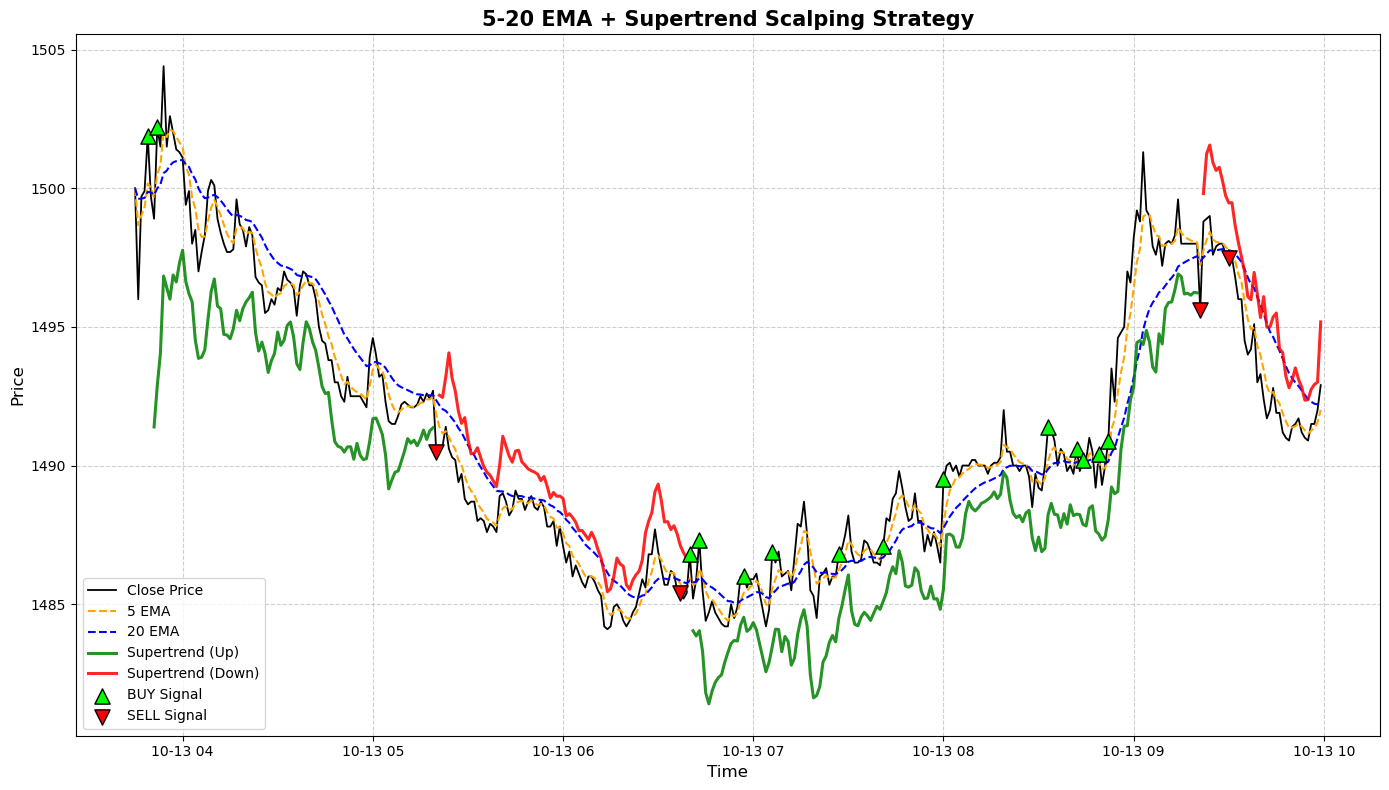

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

# --- Price and EMAs ---
plt.plot(ohlc.index, ohlc["close"], label="Close Price", color="black", linewidth=1.3)
plt.plot(ohlc.index, ohlc["EMA5"], linestyle="--", color="orange", label="5 EMA")
plt.plot(ohlc.index, ohlc["EMA20"], linestyle="--", color="blue", label="20 EMA")
#plt.plot(ohlc.index, ohlc["13EMA"], linestyle="--", color="purple", label="13 EMA")

# --- Supertrend with Colors ---
plt.plot(ohlc.index, ohlc["ST_Up"], color="green", linewidth=2.2, alpha=0.85, label="Supertrend (Up)")
plt.plot(ohlc.index, ohlc["ST_Down"], color="red", linewidth=2.2, alpha=0.85, label="Supertrend (Down)")

# --- Buy/Sell Markers ---
buy_signals = ohlc[ohlc["Signal"] == "BUY"]
sell_signals = ohlc[ohlc["Signal"] == "SELL"]

plt.scatter(buy_signals.index, buy_signals["close"],
            marker="^", color="lime", edgecolor="black", s=120,
            zorder=5, label="BUY Signal")

plt.scatter(sell_signals.index, sell_signals["close"],
            marker="v", color="red", edgecolor="black", s=120,
            zorder=5, label="SELL Signal")

# --- Chart Styling ---
plt.title("5-20 EMA + Supertrend Scalping Strategy", fontsize=15, fontweight="bold")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
